In [5]:
from redbox.graph.chat import get_chat_graph, get_chat_with_docs_graph
from redbox.models import Settings
from redbox.models.chain import ChainInput, ChainState

import tiktoken
from langchain_community.chat_models import ChatLiteLLM

from uuid import uuid4
import os

In [6]:
env = Settings()
tokenizer = tiktoken.get_encoding("cl100k_base")

llm = ChatLiteLLM(
    model=env.azure_openai_model,
    azure_api_key=env.azure_openai_api_key,
    streaming=True,
    api_base=env.azure_openai_endpoint,
    max_tokens=env.llm_max_tokens,
)


In [7]:
state = ChainState(
        query=ChainInput(
            question="what is bigger a salt or a sand?",
            file_uuids=[],
            user_uuid=uuid4(),
            chat_history=[],
        ),
    )

chat_graph = get_chat_graph(llm, tokenizer, env)

for x in chat_graph.stream(state):
    print(x)

{'set_chat_prompt_args': {'prompt_args': {'formatted_documents': ''}}}
{'llm': {'response': 'When comparing a grain of salt to a grain of sand, the grain of sand is generally larger. Grains of table salt typically have a size range of about 0.3 to 0.5 millimeters, while grains of sand can range from 0.05 to 2 millimeters in diameter. The actual size can vary depending on specific types and sources of salt and sand.'}}


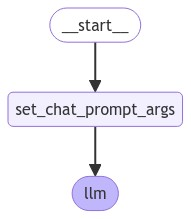

In [23]:
from IPython.display import Image, display
from langchain_core.runnables.graph import CurveStyle, MermaidDrawMethod

display(
    Image(
        chat_graph.get_graph().draw_mermaid_png(
            draw_method=MermaidDrawMethod.API,
        )
    )
)

In [17]:
from langchain_core.retrievers import BaseRetriever
from langchain_core.documents import Document


class MyRetriver(BaseRetriever):
    def _get_relevant_documents(self, query: str, *, run_manager):
        return [Document(page_content="the sky is green with pink stipes")]

In [18]:
all_chunks_retriever = MyRetriver()
chat_with_docs_graph = get_chat_with_docs_graph(llm, all_chunks_retriever, tokenizer, env)

In [28]:
state = ChainState(
        query=ChainInput(
            question="what colour is the sky?",
            file_uuids=[],
            user_uuid=uuid4(),
            chat_history=[],
        ),
    )



for x in chat_with_docs_graph.stream(state):
    print(x)

{'get_chat_docs': {'documents': [Document(page_content='the sky is green with pink stipes')]}}
{'set_chat_prompt_args': {'prompt_args': {'formatted_documents': '<Document>\n\t<UUID>None</UUID>\n\t<Filename></Filename>\n\t<Content>\nthe sky is green with pink stipes\n\t</Content>\n</Document>'}}}
{'set_chat_method': {'route_name': <ChatRoute.chat_with_docs: 'chat/documents'>}}
{'llm': {'response': 'According to the document, the sky is described as green with pink stripes.'}}
{'clear_documents': {'documents': []}}


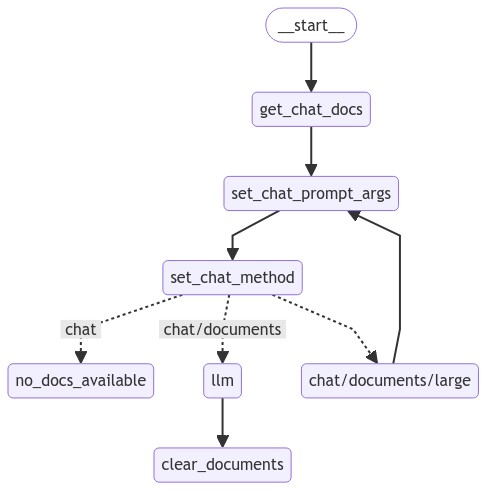

In [22]:
from IPython.display import Image, display
from langchain_core.runnables.graph import CurveStyle, MermaidDrawMethod

display(
    Image(
        chat_with_docs_graph.get_graph().draw_mermaid_png(
            draw_method=MermaidDrawMethod.API,
        )
    )
)